# Regressor

## Gastos Cartao

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
gastos = pd.read_csv("base_gastos_cartao.csv")

In [5]:
gastos.shape

(150, 5)

In [6]:
gastos.head()

,Gastos_Cartao,Idade,Renda,Impostos,Segmento
0,510,35,1120,60,C
1,490,30,1120,60,C
2,470,32,1040,60,C
3,460,31,1200,60,C
4,500,36,1120,60,C


## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = pd.concat([gastos[['Idade', 'Renda', 'Impostos']], pd.get_dummies(gastos.Segmento)], axis=1)

In [9]:
display(X)

,Idade,Renda,Impostos,A,B,C
0,35,1120,60,0,0,1
1,30,1120,60,0,0,1
2,32,1040,60,0,0,1
3,31,1200,60,0,0,1
4,36,1120,60,0,0,1
5,39,1360,120,0,0,1
6,34,1120,90,0,0,1
7,34,1200,60,0,0,1
8,29,1120,60,0,0,1
9,31,1200,30,0,0,1


### Problemas com `pd.get_dummies`
Uma vez que o modelo é colocado em produção, a predição será feita uma linha por vez, e a variável categórica será convertida para apenas uma coluna, correspondente ao valor dessa variável categórica para a linha submetida a predição.

No exemplo acima, a predição sempre retornaria apenas uma das 3 colunas esperadas (A, B ou C), sendo que seria necessário sempre retornar as 3 colunas para todas as predições.

Abaixo, a forma correta de gerar as variáveis dummy:

```
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
le.fit(gastos.Segmento)
SegmentoInt = le.transform(gastos.Segmento)

one = OneHotEncoder()
one.fit(SegmentoInt.reshape(-1, 1))
SegmentoDummies = one.transform(SegmentoInt.reshape(-1, 1))

X = pd.concat([gastos[['Idade', 'Renda', 'Impostos']],
               pd.DataFrame(SegmentoDummies.toarray())], axis=1)
```

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
le.fit(gastos.Segmento)
SegmentoInt = le.transform(gastos.Segmento)


In [11]:
# Verificando o resultado do LabelEncoder
SegmentoInt

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
one = OneHotEncoder()
one.fit(SegmentoInt.reshape(-1, 1))
SegmentoDummies = one.transform(SegmentoInt.reshape(-1, 1))

/home/thiago/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
# Verificando o resultado do OneHotEncoder
pd.DataFrame(SegmentoDummies.toarray())

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [14]:
X = pd.concat([gastos[['Idade', 'Renda', 'Impostos']],
               pd.DataFrame(SegmentoDummies.toarray())], axis=1)

In [17]:
y = gastos.Gastos_Cartao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(105, 6)
(45, 6)


## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
predictions = lr.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)

MSE: 923.5416


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

R2: 0.8612


## Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ri = Ridge(alpha=10)

In [28]:
ri.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
predictions = ri.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

MSE: 969.0087
R2: 0.8544


Para testar vários alphas, usamos a biblioteca GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
tuned_parameters = [{'alpha': [0,0.01,0.1,0.5,1,10,100]}]

In [44]:
clf = GridSearchCV(Ridge(random_state = 42), tuned_parameters, cv=4, scoring='r2')
clf.fit(X_train, y_train)

c:\users\big data t8\appdata\local\programs\python\python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.824728900225692e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\users\big data t8\appdata\local\programs\python\python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.6426987742002527e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\users\big data t8\appdata\local\programs\python\python36\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.233153927745495e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\users\big data t8\appdata\loca

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0, 0.01, 0.1, 0.5, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Um resumo dos resultados:

In [45]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print()

Best parameters set found on development set:

{'alpha': 0.5}

Grid scores on development set:

0.841 (+/-0.090) for {'alpha': 0}
0.841 (+/-0.090) for {'alpha': 0.01}
0.842 (+/-0.091) for {'alpha': 0.1}
0.842 (+/-0.093) for {'alpha': 0.5}
0.842 (+/-0.094) for {'alpha': 1}
0.839 (+/-0.098) for {'alpha': 10}
0.840 (+/-0.103) for {'alpha': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

MSE: 927.5116



A variável `clf.cv_results_` possui todos os resultados da Cross Validation (CV)

In [46]:
clf.cv_results_

c:\users\big data t8\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\big data t8\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\big data t8\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_scor

{'mean_fit_time': array([ 0.00224406,  0.00149596,  0.00149602,  0.00174493,  0.00199449,
         0.00174493,  0.00099713]),
 'std_fit_time': array([  8.26742033e-04,   4.98891019e-04,   4.98593117e-04,
          4.31777014e-04,   4.29815206e-07,   4.31776882e-04,
          2.59810623e-07]),
 'mean_score_time': array([ 0.0007481 ,  0.00049877,  0.00024927,  0.00049955,  0.00024945,
         0.        ,  0.00074768]),
 'std_score_time': array([ 0.00043191,  0.00049877,  0.00043174,  0.00049955,  0.00043205,
         0.        ,  0.00043168]),
 'param_alpha': masked_array(data = [0 0.01 0.1 0.5 1 10 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': [{'alpha': 0},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([ 0.90713446,  0.90712795,  0.90699153,  0.90583285,  0.90454318,
         0.90125202,  0.90311382]),
 'split1_test_score': array([ 0.79

Para gerar a curva de aprendizado:

In [61]:
r2s = []
for n in range(50, X_train.shape[0] + 5, 5):
    reg = Ridge(alpha = clf.best_params_['alpha'])
    reg.fit(X_train.iloc[0:n], y_train[0:n])
    pred = reg.predict(X_test)
    r2s.append(r2_score(y_test, pred))

Text(0.5,1,'Learning Curve')

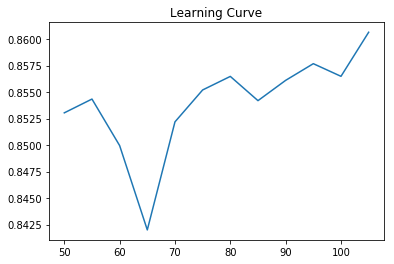

In [62]:
plt.plot(range(50, X_train.shape[0] + 5, 5), r2s)
plt.title("Learning Curve")

## TREE

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [65]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [66]:
predictions = dt.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

MSE: 1316.5579
R2: 0.8022


In [67]:
tuned_parameters = [{'max_depth': [1,2,3,4,5],
                     'min_samples_split': [2,3,5]}]

In [68]:
clf = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=3, scoring='r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [69]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print()

Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 5}

Grid scores on development set:

0.415 (+/-0.104) for {'max_depth': 1, 'min_samples_split': 2}
0.415 (+/-0.104) for {'max_depth': 1, 'min_samples_split': 3}
0.415 (+/-0.104) for {'max_depth': 1, 'min_samples_split': 5}
0.700 (+/-0.178) for {'max_depth': 2, 'min_samples_split': 2}
0.700 (+/-0.178) for {'max_depth': 2, 'min_samples_split': 3}
0.700 (+/-0.178) for {'max_depth': 2, 'min_samples_split': 5}
0.735 (+/-0.102) for {'max_depth': 3, 'min_samples_split': 2}
0.726 (+/-0.091) for {'max_depth': 3, 'min_samples_split': 3}
0.735 (+/-0.102) for {'max_depth': 3, 'min_samples_split': 5}
0.745 (+/-0.079) for {'max_depth': 4, 'min_samples_split': 2}
0.756 (+/-0.065) for {'max_depth': 4, 'min_samples_split': 3}
0.761 (+/-0.061) for {'max_depth': 4, 'min_samples_split': 5}
0.732 (+/-0.126) for {'max_depth': 5, 'min_samples_split': 2}
0.748 (+/-0.102) for {'max_depth': 5, 'min_samples_split': 3}
0.772 (+/-

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, max_features=1, random_state=42)

In [75]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [76]:
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

MSE: 1214.5313
R2: 0.8175


In [78]:
tuned_parameters = [{'max_depth': [1,2,3,4,5],
                     'max_features': [1,2,3,4,5,6]}]

clf = GridSearchCV(RandomForestRegressor(random_state=42, n_estimators=100),
                   tuned_parameters, cv=4, scoring='r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [79]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print()

Best parameters set found on development set:

{'max_depth': 5, 'max_features': 6}

Grid scores on development set:

0.442 (+/-0.101) for {'max_depth': 1, 'max_features': 1}
0.571 (+/-0.115) for {'max_depth': 1, 'max_features': 2}
0.597 (+/-0.099) for {'max_depth': 1, 'max_features': 3}
0.606 (+/-0.099) for {'max_depth': 1, 'max_features': 4}
0.604 (+/-0.096) for {'max_depth': 1, 'max_features': 5}
0.599 (+/-0.089) for {'max_depth': 1, 'max_features': 6}
0.633 (+/-0.136) for {'max_depth': 2, 'max_features': 1}
0.691 (+/-0.111) for {'max_depth': 2, 'max_features': 2}
0.721 (+/-0.084) for {'max_depth': 2, 'max_features': 3}
0.731 (+/-0.086) for {'max_depth': 2, 'max_features': 4}
0.752 (+/-0.120) for {'max_depth': 2, 'max_features': 5}
0.753 (+/-0.147) for {'max_depth': 2, 'max_features': 6}
0.716 (+/-0.117) for {'max_depth': 3, 'max_features': 1}
0.749 (+/-0.104) for {'max_depth': 3, 'max_features': 2}
0.766 (+/-0.113) for {'max_depth': 3, 'max_features': 3}
0.780 (+/-0.133) for {'max_d

# Classifier

## SPAM

In [80]:
df = pd.read_csv("spambase.data", header=None)

In [81]:
df.shape

(4601, 58)

In [82]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.iloc[:,0:56]
y = df.iloc[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
print(X_train.shape)
print(X_test.shape)

(3220, 56)
(1381, 56)


## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lo = LogisticRegression(C=10)
lo.fit(X_train, y_train)
predictions = lo.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 0.9254


Curva ROC

In [89]:
from sklearn.metrics import roc_auc_score
probs = lo.predict_proba(X_test)
roc_auc_score(y_test, probs[:,1])

0.97178104279296751

In [92]:
tuned_parameters = [{'C': [0.1,1,10,100,1000]}]

clf = GridSearchCV(LogisticRegression(random_state=42), tuned_parameters, cv=4, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.4f" % acc)
print()

Best parameters set found on development set:

{'C': 100}

Grid scores on development set:

0.919 (+/-0.019) for {'C': 0.1}
0.924 (+/-0.022) for {'C': 1}
0.923 (+/-0.017) for {'C': 10}
0.924 (+/-0.016) for {'C': 100}
0.924 (+/-0.016) for {'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.9261



Matriz de confusão:

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[769,  35],
       [ 67, 510]], dtype=int64)

F1 score:

In [95]:
from sklearn.metrics import f1_score
f1_score(y_test, clf.predict(X_test))

0.90909090909090917

## Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 0.8617


In [98]:
tuned_parameters = [{'max_depth': [1,3,5,10,20],
                     'min_samples_split': [3,5,10]}]

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tuned_parameters, cv=4, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 3, 5, 10, 20], 'min_samples_split': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [99]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.4f" % acc)
print()

Best parameters set found on development set:

{'max_depth': 10, 'min_samples_split': 10}

Grid scores on development set:

0.798 (+/-0.023) for {'max_depth': 1, 'min_samples_split': 3}
0.798 (+/-0.023) for {'max_depth': 1, 'min_samples_split': 5}
0.798 (+/-0.023) for {'max_depth': 1, 'min_samples_split': 10}
0.880 (+/-0.026) for {'max_depth': 3, 'min_samples_split': 3}
0.880 (+/-0.026) for {'max_depth': 3, 'min_samples_split': 5}
0.880 (+/-0.026) for {'max_depth': 3, 'min_samples_split': 10}
0.910 (+/-0.010) for {'max_depth': 5, 'min_samples_split': 3}
0.909 (+/-0.010) for {'max_depth': 5, 'min_samples_split': 5}
0.908 (+/-0.007) for {'max_depth': 5, 'min_samples_split': 10}
0.912 (+/-0.015) for {'max_depth': 10, 'min_samples_split': 3}
0.912 (+/-0.022) for {'max_depth': 10, 'min_samples_split': 5}
0.913 (+/-0.014) for {'max_depth': 10, 'min_samples_split': 10}
0.906 (+/-0.015) for {'max_depth': 20, 'min_samples_split': 3}
0.905 (+/-0.023) for {'max_depth': 20, 'min_samples_split': 5}

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 0.9037


In [104]:
tuned_parameters = [{'n_estimators': [100,300],
                     'max_depth': [1,3,5,10,20],
                     'max_features': [1,5,10,30,56]}]

clf = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters, cv=3, scoring='accuracy', verbose=10)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] max_depth=1, max_features=1, n_estimators=100 ...................
[CV]  max_depth=1, max_features=1, n_estimators=100, score=0.6675977653631285, total=   0.0s
[CV] max_depth=1, max_features=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, max_features=1, n_estimators=100, score=0.6598322460391426, total=   0.0s
[CV] max_depth=1, max_features=1, n_estimators=100 ...................
[CV]  max_depth=1, max_features=1, n_estimators=100, score=0.6589002795899348, total=   0.0s
[CV] max_depth=1, max_features=1, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=1, max_features=1, n_estimators=300, score=0.6787709497206704, total=   0.2s
[CV] max_depth=1, max_features=1, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=1, max_features=1, n_estimators=300, score=0.6710158434296365, total=   0.2s
[CV] max_depth=1, max_features=1, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=1, max_features=1, n_estimators=300, score=0.6710158434296365, total=   0.2s
[CV] max_depth=1, max_features=5, n_estimators=100 ...................
[CV]  max_depth=1, max_features=5, n_estimators=100, score=0.7951582867783985, total=   0.0s
[CV] max_depth=1, max_features=5, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=1, max_features=5, n_estimators=100, score=0.8182665424044734, total=   0.0s
[CV] max_depth=1, max_features=5, n_estimators=100 ...................
[CV]  max_depth=1, max_features=5, n_estimators=100, score=0.8294501397949674, total=   0.0s
[CV] max_depth=1, max_features=5, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=1, max_features=5, n_estimators=300, score=0.8091247672253259, total=   0.2s
[CV] max_depth=1, max_features=5, n_estimators=300 ...................
[CV]  max_depth=1, max_features=5, n_estimators=300, score=0.8219944082013048, total=   0.2s
[CV] max_depth=1, max_features=5, n_estimators=300 ...................
[CV]  max_depth=1, max_features=5, n_estimators=300, score=0.8247903075489282, total=   0.2s
[CV] max_depth=1, max_features=10, n_estimators=100 ..................
[CV]  max_depth=1, max_features=10, n_estimators=100, score=0.8268156424581006, total=   0.0s
[CV] max_depth=1, max_features=10, n_estimators=100 ..................
[CV]  max_depth=1, max_features=10, n_estimators=100, score=0.8499534016775396, total=   0.0s
[CV] max_depth=1, max_features=10, n_estimators=100 ..................
[CV]  max_depth=1, max_features=10, n_estimators=100, score=0.8536812674743709, total=   0.0s
[CV] max_depth=1, max_features=10, n_estimators=300 ..................
[CV]  max_dep

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 300], 'max_depth': [1, 3, 5, 10, 20], 'max_features': [1, 5, 10, 30, 56]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [105]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.4f" % acc)
print()

Best parameters set found on development set:

{'max_depth': 20, 'max_features': 5, 'n_estimators': 100}

Grid scores on development set:

0.662 (+/-0.008) for {'max_depth': 1, 'max_features': 1, 'n_estimators': 100}
0.674 (+/-0.007) for {'max_depth': 1, 'max_features': 1, 'n_estimators': 300}
0.814 (+/-0.029) for {'max_depth': 1, 'max_features': 5, 'n_estimators': 100}
0.819 (+/-0.014) for {'max_depth': 1, 'max_features': 5, 'n_estimators': 300}
0.843 (+/-0.024) for {'max_depth': 1, 'max_features': 10, 'n_estimators': 100}
0.843 (+/-0.023) for {'max_depth': 1, 'max_features': 10, 'n_estimators': 300}
0.843 (+/-0.031) for {'max_depth': 1, 'max_features': 30, 'n_estimators': 100}
0.839 (+/-0.034) for {'max_depth': 1, 'max_features': 30, 'n_estimators': 300}
0.812 (+/-0.062) for {'max_depth': 1, 'max_features': 56, 'n_estimators': 100}
0.802 (+/-0.032) for {'max_depth': 1, 'max_features': 56, 'n_estimators': 300}
0.831 (+/-0.005) for {'max_depth': 3, 'max_features': 1, 'n_estimators': 10